In [1]:
from google.colab import files

uploaded = files.upload()  # Choose your Trulia CSV file


Saving kc_house_data.csv to kc_house_data.csv


In [3]:
import pandas as pd

# Replace 'your_file.csv' with the name of your uploaded CSV
df = pd.read_csv('kc_house_data.csv')

print("Shape:", df.shape)
df.head()


Shape: (21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
# Check data types & missing values
df.info()
df.isnull().sum()

# Remove rows with missing target (price)
df = df.dropna(subset=['price'])

# Optional: Drop irrelevant columns (IDs, URLs, etc.)
df = df.drop(['id', 'url', 'address'], axis=1, errors='ignore')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Keep only numeric features for now
df_num = df.select_dtypes(include=['int64', 'float64'])

# Features (X) and target (y)
X = df_num.drop('price', axis=1)
y = df_num['price']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(17290, 18) (4323, 18)


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


MSE: 45173046132.79
RMSE: 212539.52
MAE: 127493.34
R²: 0.70


In [9]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Intercept:", model.intercept_)
coef_df


Intercept: 6643873.527888229


Feature    Coefficient
14            lat  595968.122144
5      waterfront  562413.070005
8           grade   94567.891697
6            view   53641.107022
1       bathrooms   44564.528881
7       condition   24526.710105
4          floors    7003.129520
2     sqft_living     109.015817
9      sqft_above      70.022741
10  sqft_basement      38.993076
16  sqft_living15      21.214331
12   yr_renovated      20.415633
3        sqft_lot       0.088847
17     sqft_lot15      -0.325832
13        zipcode    -552.253038
11       yr_built   -2680.768897
0        bedrooms  -34335.418739
15           long -194585.724048

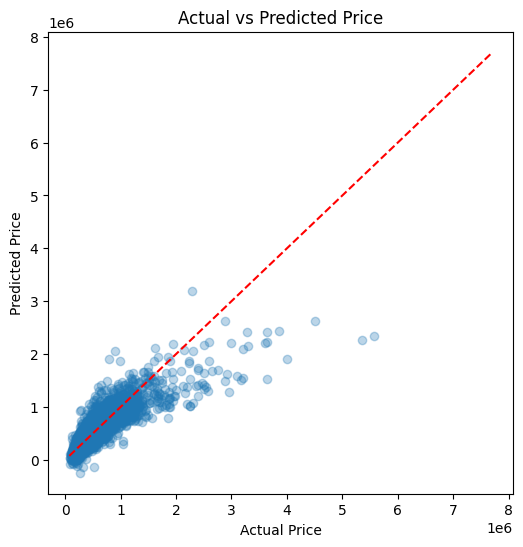

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()
